### **Week 12: Project Work & Review**
**Objective**: Guide students through a final project to apply everything they’ve learned in data analysis, visualization, and statistical testing.

### **1. Introduction to the Final Project**
#### **Overview**:
- **Project Aim**: Allow students to explore a real-world dataset, perform exploratory data analysis (EDA), visualization, and statistical testing, and present their findings.
- **Project Components**:
  - Data cleaning and preparation.
  - EDA (including data visualization).
  - Hypothesis testing.
  - Regression analysis or other relevant statistical analysis.
  - Final report with interpretations and visualizations.
- **Data Choices**: Choose a dataset relevant to biology or chemistry, or allow students to bring their own datasets if they have specific research interests.

#### **Example Dataset Suggestions**:
1. **Biology**: 
   - Gene expression data (e.g., comparison of gene activity between healthy and diseased tissues).
   - Clinical trial data (e.g., effects of a new drug on patient recovery).
   - Environmental biology data (e.g., impact of temperature on species distribution).

2. **Chemistry**: 
   - Chemical reaction data (e.g., the influence of concentration on reaction rates).
   - Absorption spectra of various compounds.
   - Protein-ligand binding assays (e.g., effectiveness of different compounds in binding to a protein).


### **2. Step-by-Step Guidance for the Project**
#### **Step 1: Choose a Dataset**
- Instructors provide a list of datasets, or students can propose their own.
- **Guidelines**:
  - Data should have at least 100 rows and multiple columns.
  - The dataset should be relevant to biology or chemistry.
  - The dataset should have both numerical and categorical variables.

#### **Example**:
- Provide a dataset on **"Drug Dosage and Recovery Time in Clinical Trials"**:
  - Columns: `Patient ID`, `Dosage (mg)`, `Age`, `Sex`, `Recovery Time (days)`, `Side Effects (None/Mild/Severe)`.
  - Aim: Analyze how drug dosage and patient demographics impact recovery time.

#### **Hands-On Exercise**:
- *Select a dataset and briefly describe the research question you want to explore.*
- *Check for any missing values in your dataset.*

---

### **Step 2: Data Cleaning and Preparation**
- Students will clean the dataset, handling missing data, renaming columns, and ensuring consistent formatting.
  
#### **Key Concepts**:
- **Data Cleaning**: Handling missing values, renaming columns, changing data types.
- **Filtering**: Removing irrelevant or outlier data.
- **Transformations**: Scaling or normalizing data if necessary.


#### **Examples**:
1. **Data Cleaning in Medical Data**:
   - Fill in missing values for patient age with the median age.
   - Convert drug dosage data from mg to µg for better analysis.

In [4]:
import pandas as pd
# Example dataset
data = {
    'Patient_ID': [1, 2, 3, 4, 5],
    'Dosage_mg': [50, 60, None, 80, 70],
    'Recovery_Time': [7, 5, 6, 8, None],
    'Side_Effects': ['Mild', 'None', 'Severe', None, 'Mild']
}
df = pd.DataFrame(data)

# Handling missing data
# df['Dosage_mg'].fillna(df['Dosage_mg'].median(), inplace=True)
df.fillna({'Dosage_mg': df['Dosage_mg'].median()}, inplace=True)
# df['Recovery_Time'].fillna(df['Recovery_Time'].median(), inplace=True)
df.fillna({'Recovery_Time' : df['Recovery_Time'].median()}, inplace=True)
# df['Side_Effects'].fillna('Unknown', inplace=True)
df.fillna({"Side_Effects" : "Unknown"}, inplace=True)

#### **Hands-On Exercise**:
- *Check for duplicates in your dataset and remove them if necessary.*
- *Fill in any missing values with appropriate statistics (mean, median, or mode).*

---

### **Step 3: Exploratory Data Analysis (EDA)**
- Students perform EDA to identify patterns, trends, and relationships.
- Create visualizations to explore the data.

#### **Key Concepts**:
- **Data Summarization**: Calculate mean, median, mode, standard deviation.
- **Visualization**: Use histograms, scatter plots, box plots, and heatmaps.

#### **Examples**:
1. **Biological EDA**:
   - Visualize the distribution of recovery times based on patient age.
   - Analyze the correlation between drug dosage and recovery time.

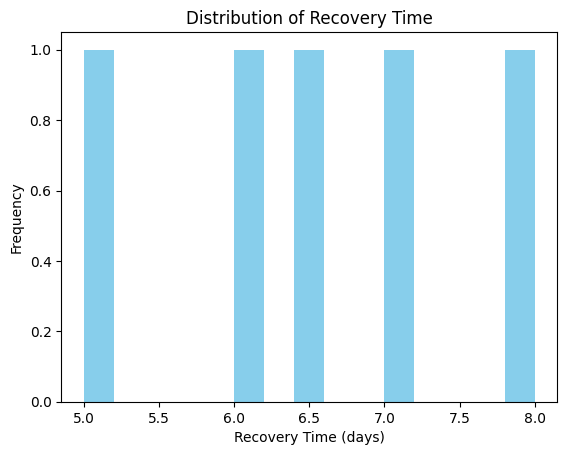

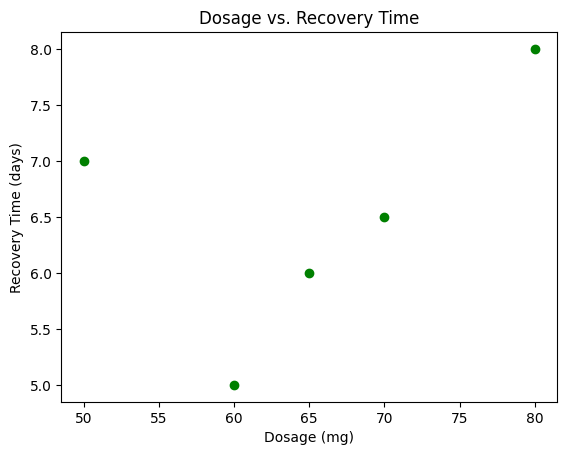

In [6]:
import matplotlib.pyplot as plt

# Plot a histogram of recovery times
plt.hist(df['Recovery_Time'], bins=15, color='skyblue')
plt.xlabel('Recovery Time (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Recovery Time')
plt.show()

# Scatter plot for dosage vs. recovery time
plt.scatter(df['Dosage_mg'], df['Recovery_Time'], color='green')
plt.xlabel('Dosage (mg)')
plt.ylabel('Recovery Time (days)')
plt.title('Dosage vs. Recovery Time')
plt.show()

#### **Hands-On Exercise**:
- *Generate summary statistics for your dataset.*
- *Visualize at least two relationships between variables using scatter plots.*

---

### **Step 4: Hypothesis Testing**
- Formulate hypotheses and perform statistical tests.
  
#### **Key Concepts**:
- **Null and Alternative Hypotheses**: Define what you’re testing.
- **Significance Testing**: Use t-tests, chi-square tests, or ANOVA to validate your hypothesis.
- **p-value**: Understand the significance of results.

#### **Examples**:
1. **Hypothesis Testing for Chemical Data**:
   - **Scenario**: Test if there’s a significant difference in reaction times at two different temperatures.
   - Use a **two-sample t-test** to compare reaction rates.



In [7]:
from scipy.stats import ttest_ind

# Sample reaction data
reaction_data = pd.DataFrame({
    'Temperature': ['High', 'High', 'Low', 'Low', 'High', 'Low'],
    'Reaction_Time': [12.5, 13.0, 20.1, 21.0, 14.0, 19.8]
})

# Split data based on temperature
high_temp = reaction_data[reaction_data['Temperature'] == 'High']['Reaction_Time']
low_temp = reaction_data[reaction_data['Temperature'] == 'Low']['Reaction_Time']

# Perform t-test
t_stat, p_value = ttest_ind(high_temp, low_temp)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -12.523402749985978, P-value: 0.00023389614481794378


#### **Hands-On Exercise**:
- *Formulate a hypothesis using your dataset.*
- *Conduct a hypothesis test and interpret the results.*

---

### **Step 5: Regression Analysis (Optional)**
- If relevant, perform regression analysis to understand relationships.
  
#### **Key Concepts**:
- **Linear Regression**: Fit a simple line to data and interpret coefficients.
- **Multivariate Analysis**: Explore relationships involving multiple variables.

#### **Examples**:
1. **Simple Linear Regression on Drug Data**:
   - Predict recovery time based on dosage and patient age.

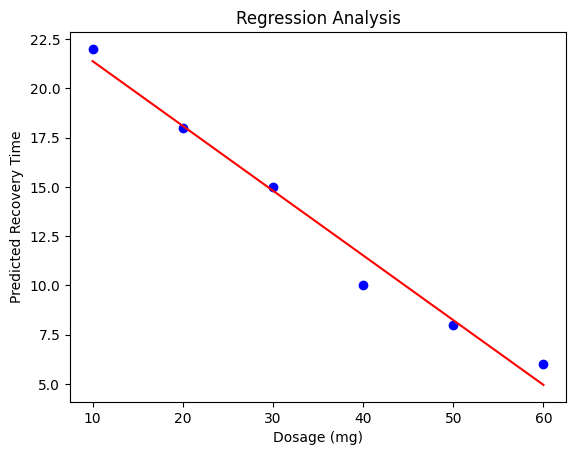

Coefficients: [-0.16428571 -0.16428571]
Intercept: 27.13095238095238


In [9]:
import numpy as np

from sklearn.linear_model import LinearRegression

# Sample Data
data = {
    'Dosage_mg': [10, 20, 30, 40, 50, 60],
    'Patient_Age': [25, 35, 45, 55, 65, 75],
    'Recovery_Time': [22, 18, 15, 10, 8, 6]
}

df = pd.DataFrame(data)

# Define the features and target variable
X = df[['Dosage_mg', 'Patient_Age']]
y = df['Recovery_Time']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Visualize the regression line (for 'Dosage_mg' vs 'Recovery_Time' specifically)
plt.scatter(df['Dosage_mg'], y, color='blue')
plt.plot(df['Dosage_mg'], predictions, color='red')
plt.xlabel('Dosage (mg)')
plt.ylabel('Predicted Recovery Time')
plt.title('Regression Analysis')
plt.show()

# Print model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)



#### **Hands-On Exercise**:
- *Perform a simple linear regression using your dataset.*
- *Interpret the regression output and discuss the significance.*

---

### **6. Creating the Final Report**
- **Report Structure**:
  - **Introduction**: What was analyzed, and why?
  - **Methodology**: How the data was cleaned, analyzed, and tested.
  - **Results**: Visualizations, EDA findings, hypothesis test results, regression analysis.
  - **Conclusion**: Summary of insights and recommendations.
- **Tools**: Students will use Jupyter notebooks to present their work with code and markdown cells.

#### **Hands-On Exercise**:
- *Prepare a report on your findings with visualizations and conclusions.*
- *Submit the code along with the report for evaluation.*

---

### **7. Project Presentation**
- **Presentation Format**:
  - **5-10 minute presentation**: Students will present their findings using visualizations.
  - **Q&A Session**: Allow other students to ask questions about the analysis.
  - **Feedback**: Provide constructive feedback on the project.


#### **Hands-On Exercise**:
- *Create a presentation slide summarizing your key findings.*
- *Prepare to discuss the implications of your results and answer any questions.*

---


### **Week Recap**
- **Key Takeaways**:
  - Integration of data analysis skills.
  - Hands-on experience with real-world data.
  - Practice in presenting and interpreting statistical results.
- **Skills Reinforced**:
  - Data cleaning and manipulation.
  - Visualization and EDA.
  - Statistical hypothesis testing.
  - Regression analysis.